In [24]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

In [25]:
df = pd.read_csv("Education - Post 12th Standard-1.csv")
df.head(10)

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   
5             Albertson College   587     479     158         38         62   
6       Albertus Magnus College   353     340     103         17         45   
7                Albion College  1899    1720     489         37         68   
8              Albright College  1038     839     227         30         63   
9     Alderson-Broaddus College   582     498     172         21         44   

   F_Undergrad  P_Undergrad  Outstate  Room_Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   
5          678           41     13500        3335    500       675   67   
6          416          230     13290        5720    500      1500   90   
7         1594           32     13868        4826    450       850   89   
8          973          306     15595        4400    300       500   79   
9          799           78     10468        3380    660      1800   40   

   Terminal  S_F_Ratio  perc_alumni  Expend  Grad_Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15  
5        73        9.4           11    9727         55  
6        93       11.5           26    8861         63  
7       100       13.7           37   11487         73  
8        84       11.3           23   11644         80  
9        41       11.5           15    8991         52

In [26]:
df.isna().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F_Undergrad    0
P_Undergrad    0
Outstate       0
Room_Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S_F_Ratio      0
perc_alumni    0
Expend         0
Grad_Rate      0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F_Undergrad  777 non-null    int64  
 7   P_Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room_Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S_F_Ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad_Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [28]:

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Names, Apps, Accept, Enroll, Top10perc, Top25perc, F_Undergrad, P_Undergrad, Outstate, Room_Board, Books, Personal, PhD, Terminal, S_F_Ratio, perc_alumni, Expend, Grad_Rate]
Index: []

In [98]:
df['Names'].duplicated().sum()

0

 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

Univariate Analysis

0     440
1     663
2    1006
dtype: int64

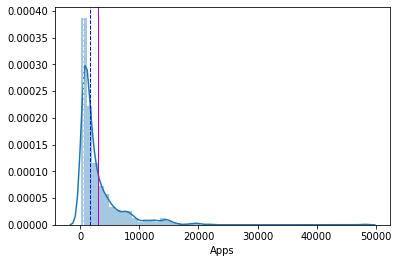

In [90]:
sns.distplot(df.Apps) 
plt.axvline(df.Apps.mean(), color='m', linewidth=1)
plt.axvline(df.Apps.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df.Apps.mode()[0], color='w', linestyle='dashed', linewidth=1)
df.Apps.mode()

0    452
dtype: int64

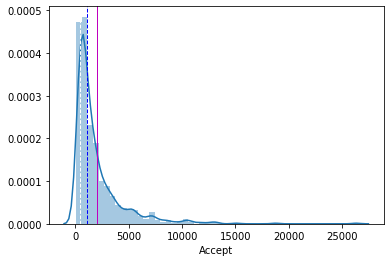

In [89]:
sns.distplot(df.Accept) 
plt.axvline(df.Accept.mean(), color='m', linewidth=1)
plt.axvline(df.Accept.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df.Accept.mode()[0], color='w', linestyle='dashed', linewidth=1)
df.Accept.mode()

0    20
dtype: int64

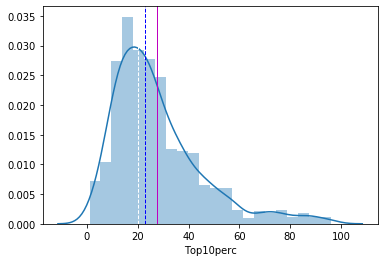

In [88]:
sns.distplot(df.Top10perc) 

plt.axvline(df.Top10perc.mean(), color='m', linewidth=1)
plt.axvline(df.Top10perc.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df.Top10perc.mode()[0], color='w', linestyle='dashed', linewidth=1)
df.Top10perc.mode()

0    55
1    60
dtype: int64

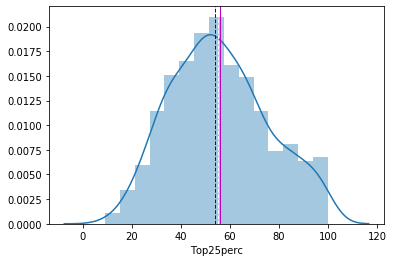

In [86]:
sns.distplot(df.Top25perc) 

plt.axvline(df.Top25perc.mean(), color='m', linewidth=1)
plt.axvline(df.Top25perc.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df.Top25perc.mode()[0], color='w', linestyle='dashed', linewidth=1)
df.Top25perc.mode()

0     500
1     662
2     959
3    1115
4    1306
5    1345
6    1707
dtype: int64

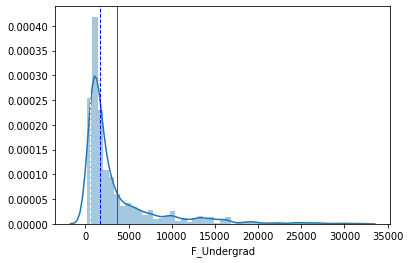

In [81]:
sns.distplot(df.F_Undergrad) 

plt.axvline(df.F_Undergrad.mean(), color='m', linewidth=1)
plt.axvline(df.F_Undergrad.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df.F_Undergrad.mode()[0], color='w', linestyle='dashed', linewidth=1)
df.F_Undergrad.mode()

0    30
dtype: int64

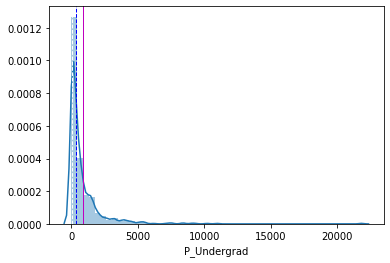

In [80]:
sns.distplot(df.P_Undergrad) 

plt.axvline(df.P_Undergrad.mean(), color='m', linewidth=1)
plt.axvline(df.P_Undergrad.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df.P_Undergrad.mode()[0], color='w', linestyle='dashed', linewidth=1)
df.P_Undergrad.mode()

0    6550
dtype: int64

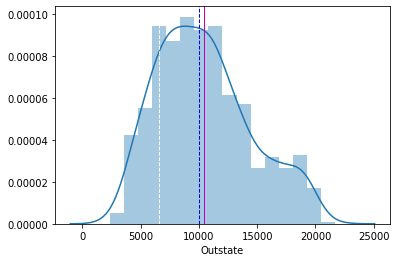

In [79]:
sns.distplot(df.Outstate) 
plt.axvline(df.Outstate.mean(), color='m', linewidth=1)
plt.axvline(df.Outstate.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df.Outstate.mode()[0], color='w', linestyle='dashed', linewidth=1)
df.Outstate.mode()

0    4100
dtype: int64

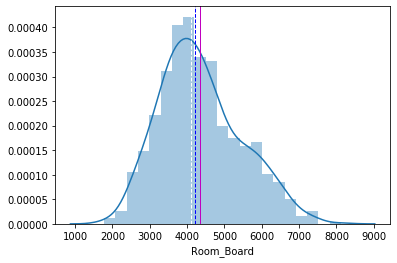

In [78]:
sns.distplot(df.Room_Board) 
plt.axvline(df.Room_Board.mean(), color='m', linewidth=1)
plt.axvline(df.Room_Board.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df.Room_Board.mode()[0], color='w', linestyle='dashed', linewidth=1)
df.Room_Board.mode()

0    500
dtype: int64

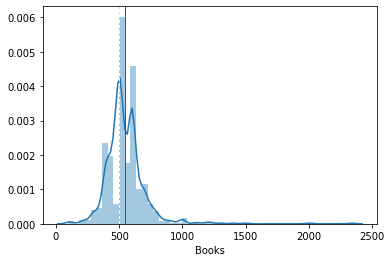

In [77]:
sns.distplot(df.Books) 

plt.axvline(df.Books.mean(), color='m', linewidth=1)
plt.axvline(df.Books.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df.Books.mode()[0], color='w', linestyle='dashed', linewidth=1)
df.Books.mode()

0    1000
dtype: int64

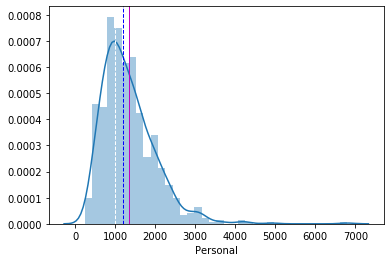

In [76]:
sns.distplot(df.Personal) 

plt.axvline(df.Personal.mean(), color='m', linewidth=1)
plt.axvline(df.Personal.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df.Personal.mode()[0], color='w', linestyle='dashed', linewidth=1)
df.Personal.mode()

0    77
dtype: int64

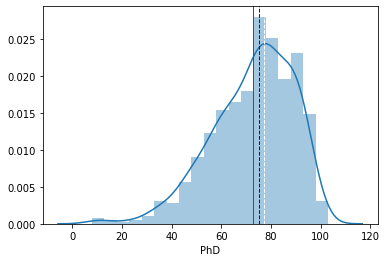

In [70]:
sns.distplot(df.PhD) 

plt.axvline(df.PhD.mean(), color='m', linewidth=1)
plt.axvline(df.PhD.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df.PhD.mode()[0], color='w', linestyle='dashed', linewidth=1)
df.PhD.mode()

0    96
dtype: int64

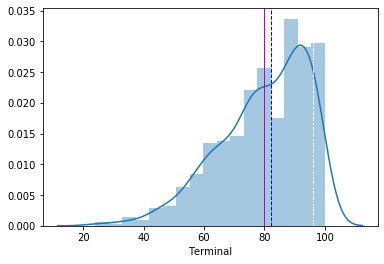

In [75]:
sns.distplot(df.Terminal) 

plt.axvline(df.Terminal.mean(), color='m', linewidth=1)
plt.axvline(df.Terminal.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df.Terminal.mode()[0], color='w', linestyle='dashed', linewidth=1)
df.Terminal.mode()

0    12.1
dtype: float64

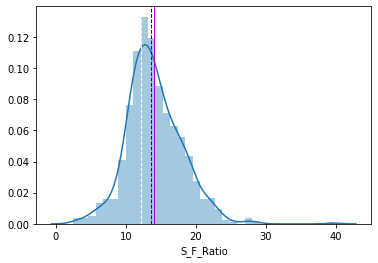

In [62]:
sns.distplot(df.S_F_Ratio) 

plt.axvline(df.S_F_Ratio.mean(), color='m', linewidth=1)
plt.axvline(df.S_F_Ratio.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df.S_F_Ratio.mode()[0], color='w', linestyle='dashed', linewidth=1)
df.S_F_Ratio.mode()

0    10
dtype: int64

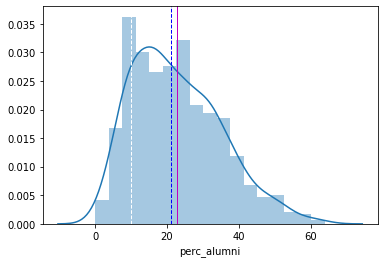

In [64]:
sns.distplot(df.perc_alumni) 

plt.axvline(df.perc_alumni.mean(), color='m', linewidth=1)
plt.axvline(df.perc_alumni.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df.perc_alumni.mode()[0], color='w', linestyle='dashed', linewidth=1)
df.perc_alumni.mode()

0      4900
1      5935
2      6333
3      6413
4      6433
5      6562
6      6716
7      6719
8      6898
9      6971
10     7041
11     7114
12     7309
13     7348
14     7762
15     7881
16     7940
17     8118
18     8135
19     8189
20     8324
21     8355
22     8604
23     8686
24     8847
25     8954
26     9084
27     9158
28     9209
29     9431
30    10872
31    10912
32    10922
dtype: int64

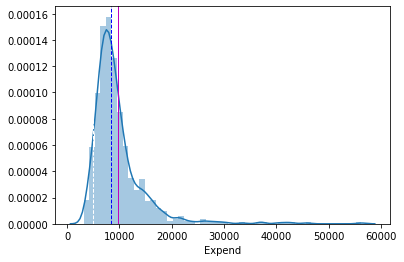

In [68]:
sns.distplot(df.Expend) 
plt.axvline(df.Expend.mean(), color='m', linewidth=1)
plt.axvline(df.Expend.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df.Expend.mode()[0], color='w', linestyle='dashed', linewidth=1)
df.Expend.mode()

0    72
dtype: int64

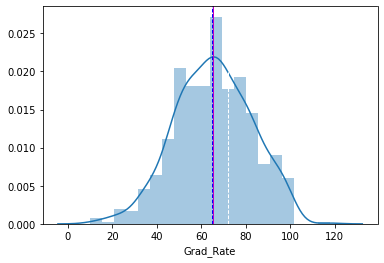

In [91]:
sns.distplot(df.Grad_Rate) 
plt.axvline(df.Grad_Rate.mean(), color='m', linewidth=1)
plt.axvline(df.Grad_Rate.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df.Grad_Rate.mode()[0], color='w', linestyle='dashed', linewidth=1)
df.Grad_Rate.mode()

Multivariate Analysis

In [93]:
df.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F_Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F_Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P_Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room_Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S_F_Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc_alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad_Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P_Undergrad  Outstate  Room_Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F_Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P_Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room_Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S_F_Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc_alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad_Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S_F_Ratio  perc_alumni    Expend  Grad_Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F_Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P_Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room_Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S_F_Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc_alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

In [99]:
df.cov()

Apps        Accept        Enroll     Top10perc  \
Apps         1.497846e+07  8.949860e+06  3.045256e+06  23132.773138   
Accept       8.949860e+06  6.007960e+06  2.076268e+06   8321.124872   
Enroll       3.045256e+06  2.076268e+06  8.633684e+05   2971.583415   
Top10perc    2.313277e+04  8.321125e+03  2.971583e+03    311.182456   
Top25perc    2.695266e+04  1.201340e+04  4.172592e+03    311.630480   
F_Undergrad  1.528970e+07  1.039358e+07  4.347530e+06  12089.113681   
P_Undergrad  2.346620e+06  1.646670e+06  7.257907e+05  -2829.474981   
Outstate     7.809704e+05 -2.539623e+05 -5.811885e+05  39907.179832   
Room_Board   7.000729e+05  2.443471e+05 -4.099706e+04   7186.705605   
Books        8.470375e+04  4.594281e+04  1.729120e+04    346.177405   
Personal     4.683468e+05  3.335566e+05  1.767380e+05  -1114.551186   
PhD          2.468943e+04  1.423820e+04  5.028961e+03    153.184870   
Terminal     2.105307e+04  1.218209e+04  4.217086e+03    127.551581   
S_F_Ratio    1.465061e+03  1.709838e+03  8.726848e+02    -26.874525   
perc_alumni -4.327122e+03 -4.859487e+03 -2.081694e+03     99.567208   
Expend       5.246171e+06  1.596272e+06  3.113454e+05  60879.310196   
Grad_Rate    9.756422e+03  2.834163e+03 -3.565880e+02    149.992164   

                Top25perc   F_Undergrad   P_Undergrad      Outstate  \
Apps         26952.663479  1.528970e+07  2.346620e+06  7.809704e+05   
Accept       12013.404757  1.039358e+07  1.646670e+06 -2.539623e+05   
Enroll        4172.592435  4.347530e+06  7.257907e+05 -5.811885e+05   
Top10perc      311.630480  1.208911e+04 -2.829475e+03  3.990718e+04   
Top25perc      392.229216  1.915895e+04 -1.615412e+03  3.899243e+04   
F_Undergrad  19158.952782  2.352658e+07  4.212910e+06 -4.209843e+06   
P_Undergrad  -1615.412144  4.212910e+06  2.317799e+06 -1.552704e+06   
Outstate     38992.427500 -4.209843e+06 -1.552704e+06  1.618466e+07   
Room_Board    7199.903568 -3.664582e+05 -1.023919e+05  2.886597e+06   
Books          377.759266  9.253576e+04  2.041045e+04  2.580824e+04   
Personal     -1083.605065  1.041709e+06  3.297324e+05 -8.146737e+05   
PhD            176.518449  2.521178e+04  3.706756e+03  2.515752e+04   
Terminal       153.002612  2.142424e+04  3.180597e+03  2.416415e+04   
S_F_Ratio      -23.097199  5.370209e+03  1.401303e+03 -8.835254e+03   
perc_alumni    102.550946 -1.379193e+04 -5.297337e+03  2.822955e+04   
Expend       54546.483305  4.724040e+05 -6.643512e+05  1.413324e+07   
Grad_Rate      162.371398 -6.563308e+03 -6.721062e+03  3.947968e+04   

               Room_Board         Books      Personal           PhD  \
Apps         7.000729e+05  84703.752639  4.683468e+05  24689.433666   
Accept       2.443471e+05  45942.807867  3.335566e+05  14238.201489   
Enroll      -4.099706e+04  17291.199742  1.767380e+05   5028.961166   
Top10perc    7.186706e+03    346.177405 -1.114551e+03    153.184870   
Top25perc    7.199904e+03    377.759266 -1.083605e+03    176.518449   
F_Undergrad -3.664582e+05  92535.764728  1.041709e+06  25211.784197   
P_Undergrad -1.023919e+05  20410.446674  3.297324e+05   3706.756219   
Outstate     2.886597e+06  25808.242145 -8.146737e+05  25157.515051   
Room_Board   1.202743e+06  23170.313390 -1.480838e+05   5895.034749   
Books        2.317031e+04  27259.779946  2.004303e+04     72.534242   
Personal    -1.480838e+05  20043.025650  4.584258e+05   -120.898783   
PhD          5.895035e+03     72.534242 -1.208988e+02    266.608636   
Terminal     6.047300e+03    242.963918 -3.051542e+02    204.231332   
S_F_Ratio   -1.574206e+03    -20.867207  3.654158e+02     -8.436492   
perc_alumni  3.701431e+03    -82.263132 -2.399311e+03     50.383230   
Expend       2.873308e+06  96912.580326 -3.460978e+05  36898.058233   
Grad_Rate    8.005360e+03      3.008837 -3.132615e+03     85.557109   

                 Terminal     S_F_Ratio   perc_alumni        Expend  \
Apps         21053.067602   1465.060576  -4327.122381  5.246171e+06   
Accept       12182.093828   1709.838189  -

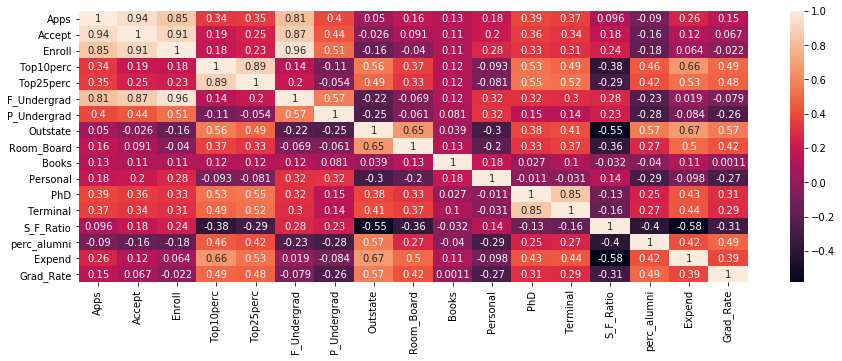

In [95]:
plt.figure(figsize =(15,5))
sns.heatmap(df.corr(), annot=True)

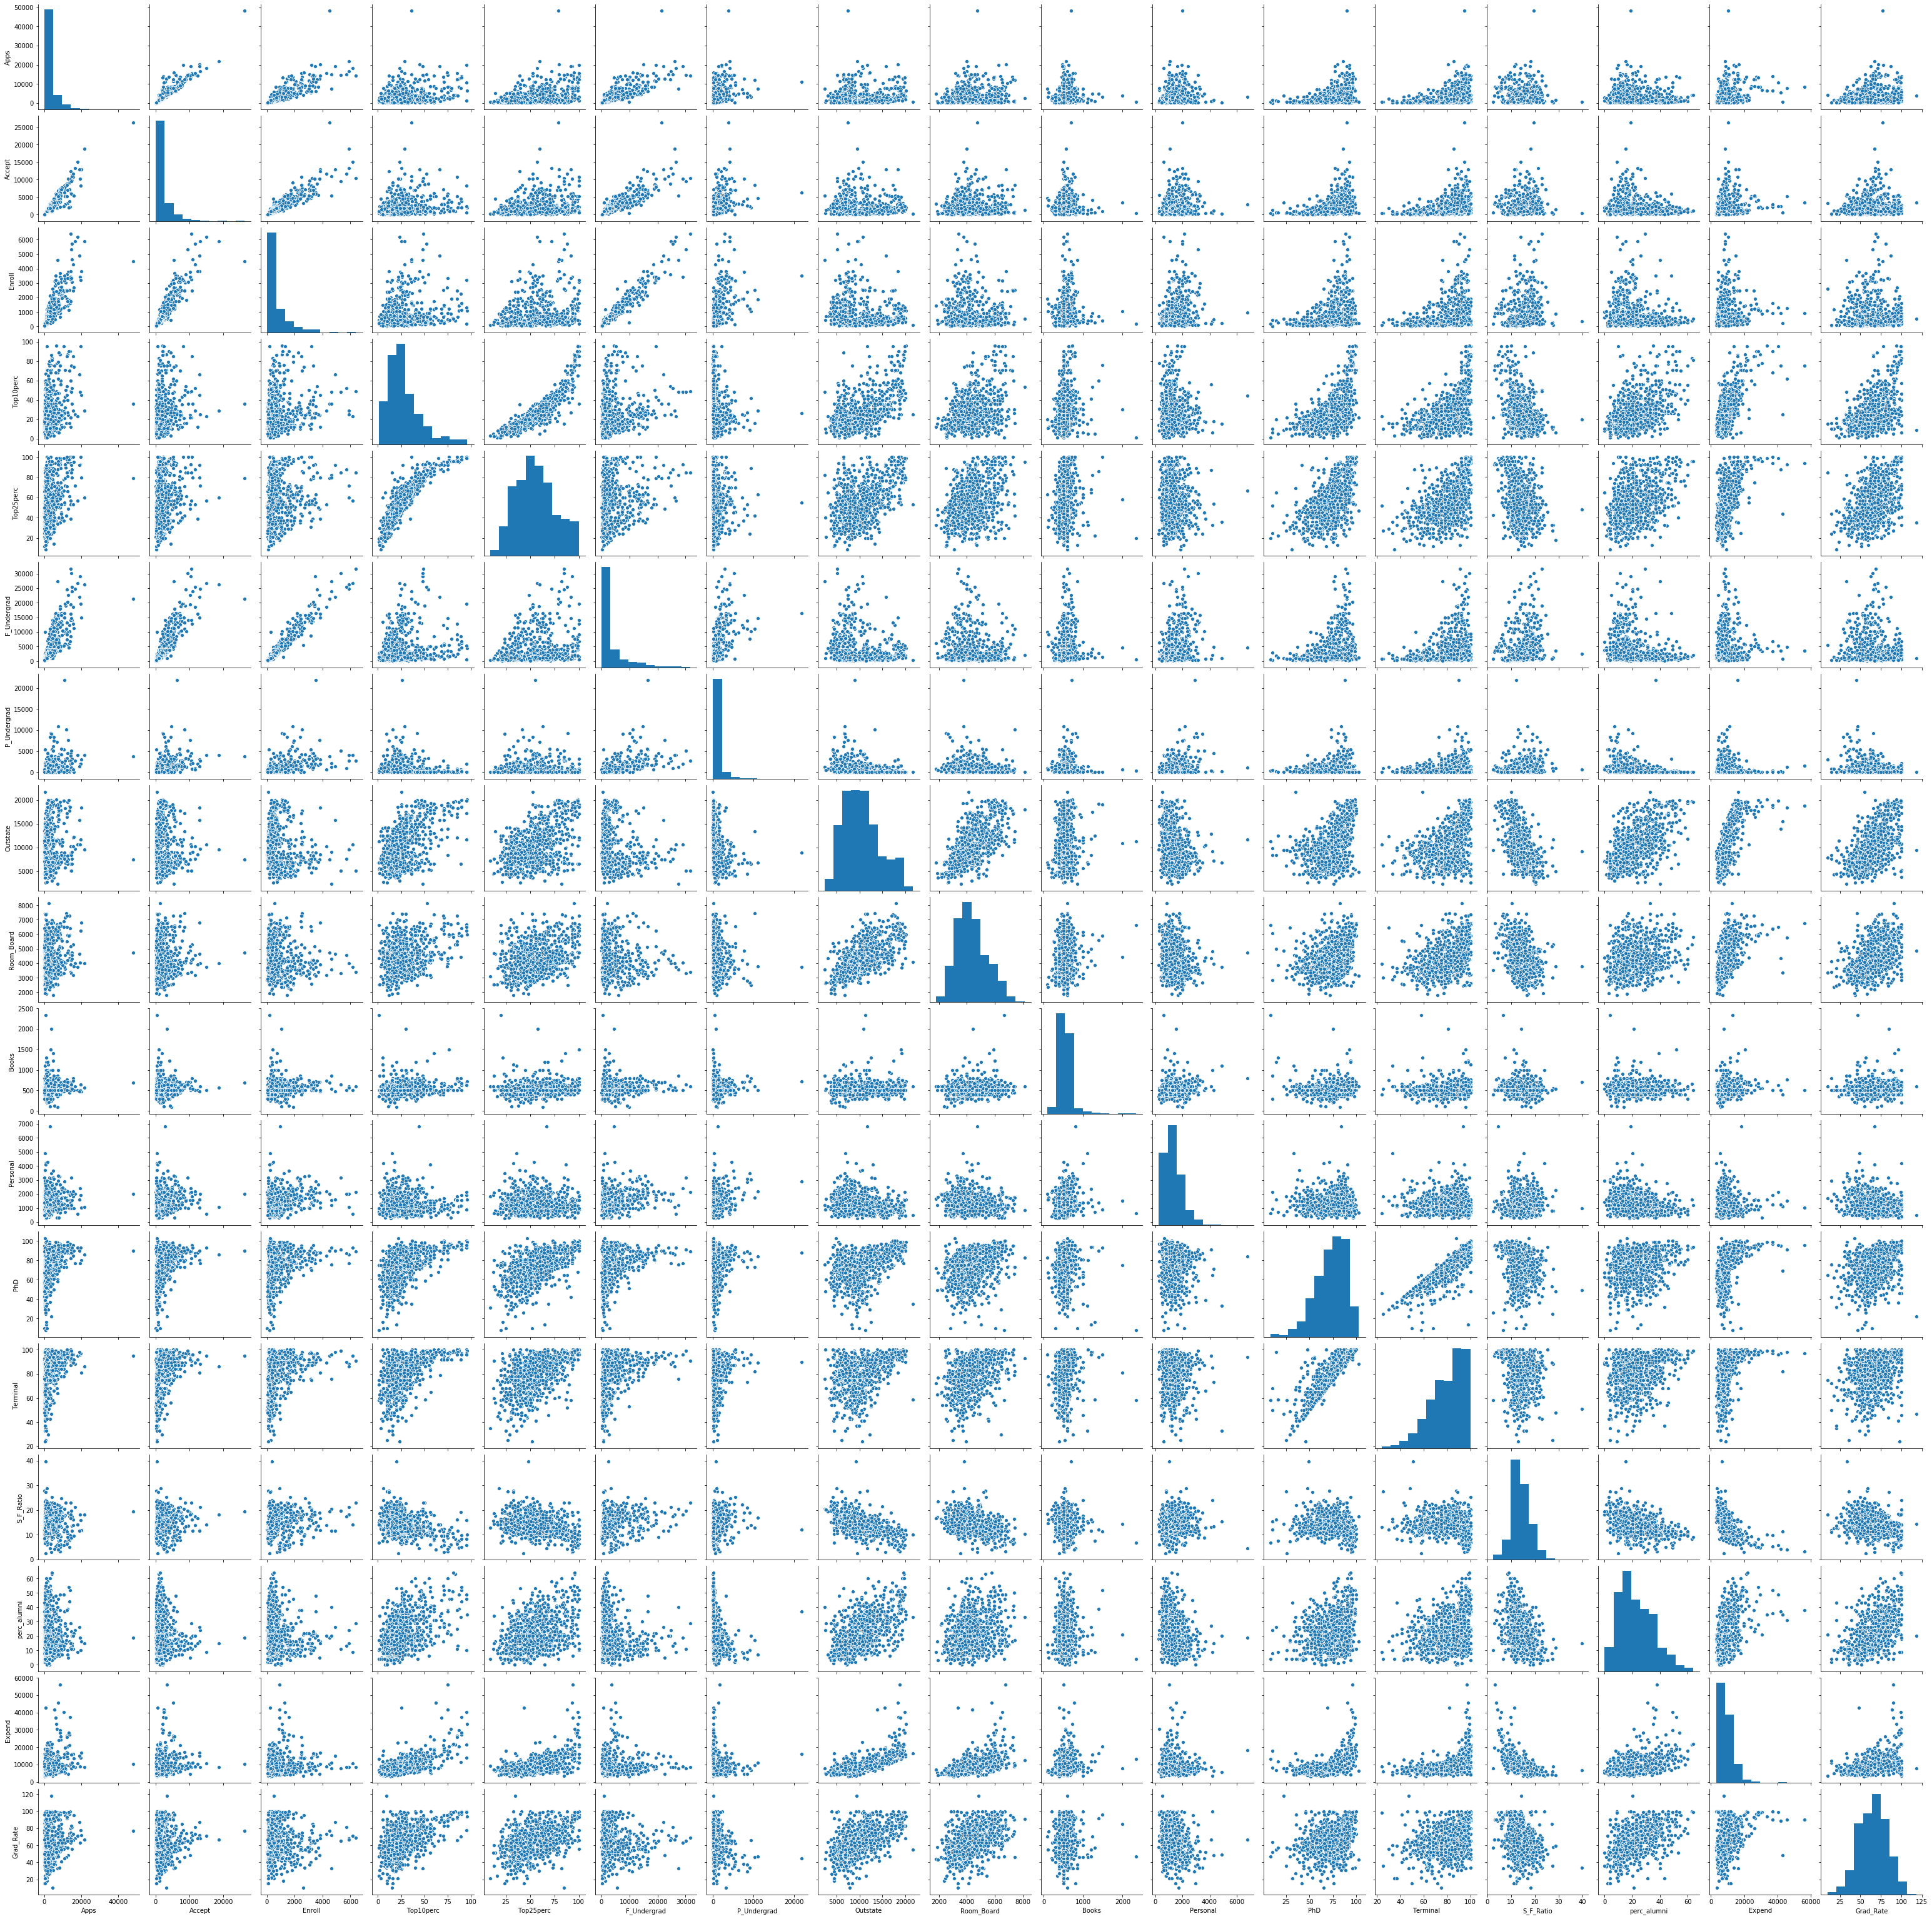

In [96]:
sns.pairplot(df)

2.2) Scale the variables and write the inference for using the type of scaling function for this case study. 

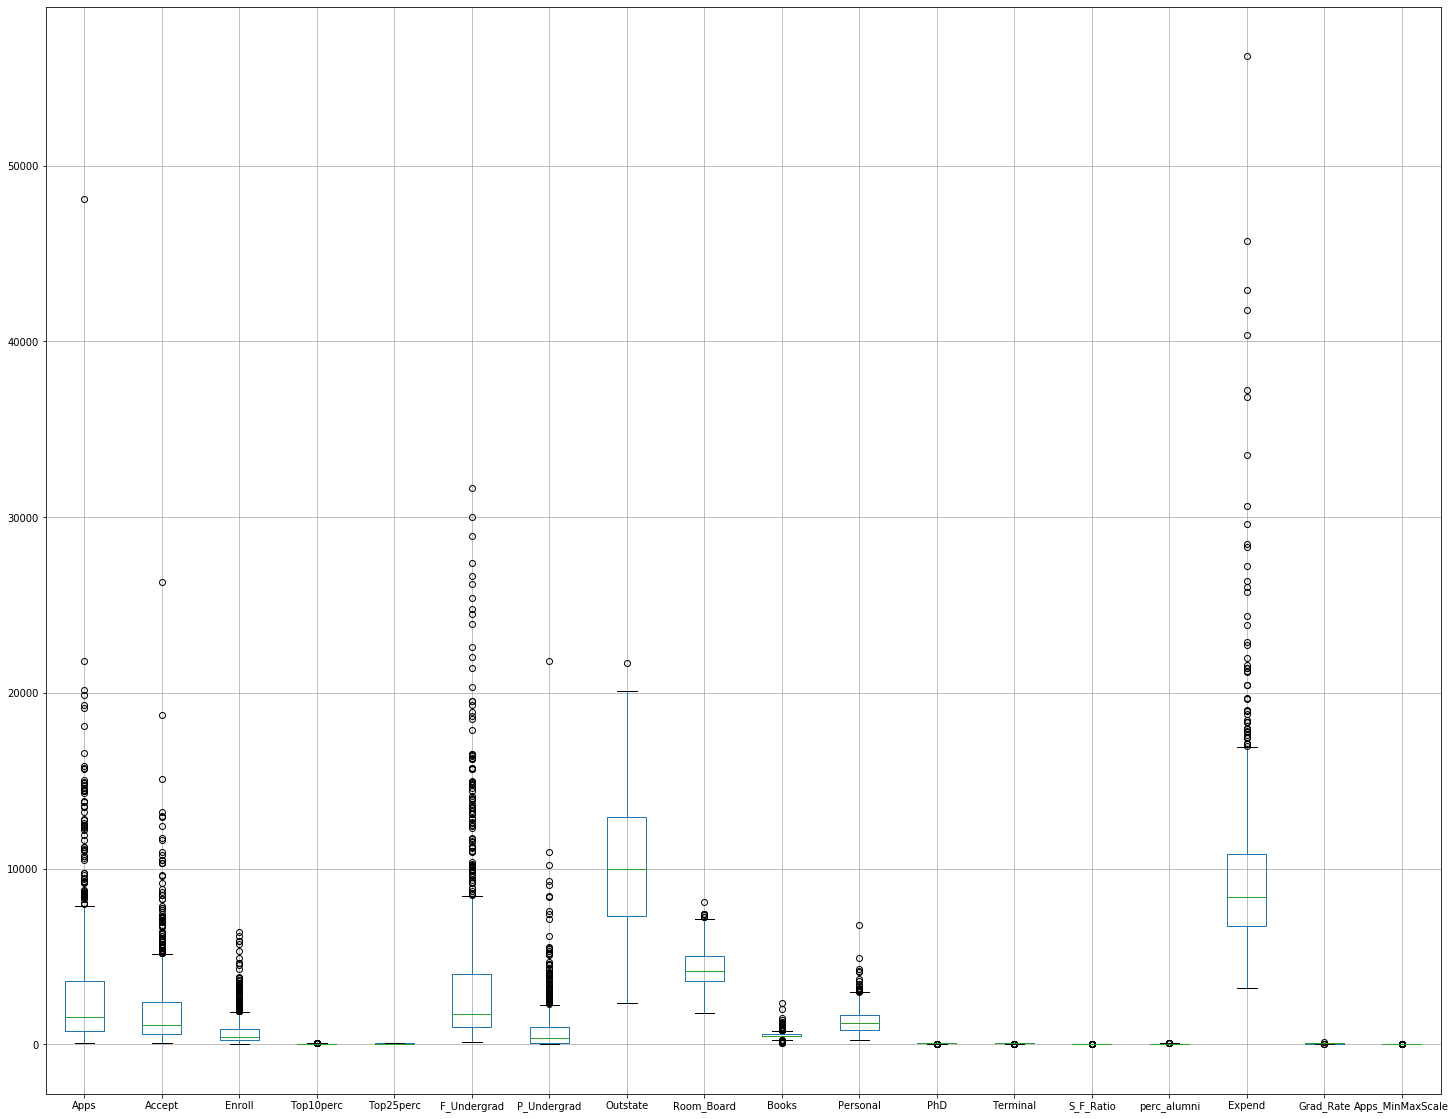

In [107]:
df.boxplot(figsize=(25,20))

In [101]:
from sklearn.preprocessing import MinMaxScaler

minmax_scale = MinMaxScaler()

In [103]:
df.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F_Undergrad', 'P_Undergrad', 'Outstate', 'Room_Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S_F_Ratio', 'perc_alumni', 'Expend',
       'Grad_Rate'],
      dtype='object')

In [106]:
df['Apps_MinMaxScale'] = minmax_scale.fit_transform(df[['Apps']])
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F_Undergrad   P_Undergrad      Outstate   Room_Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S_F_Ratio  perc_alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad_Rate  Apps_MinMaxScale  
count    777.000000  777.00000        777.000000  
mean    9660.171171   65.46332          0.060830  
std     5221.768440   17.17771          0.080607  
min     3186.000000   10.00000          0.000000  
25%     6751.000000   53.00000          0.014475  
50%     8377.000000   65.00000          0.030763  
75%    10830.000000   78.00000          0.073793  
max    56233.000000  118.00000          1.000000

In [115]:
df['Accept_MinMaxScale'] = minmax_scale.fit_transform(df[['Accept']])
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F_Undergrad   P_Undergrad      Outstate   Room_Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S_F_Ratio  perc_alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad_Rate  Apps_MinMaxScale  Accept_MinMaxScale  
count    777.000000  777.00000        777.000000          777.000000  
mean    9660.171171   65.46332          0.060830            0.074141  
std     5221.768440   17.17771          0.080607            0.093347  
min     3186.000000   10.00000          0.000000            0.000000  
25%     6751.000000   53.00000          0.014475            0.020260  
50%     8377.000000   65.00000          0.030763            0.039531  
75%    10830.000000   78.00000          0.073793            0.089573  
max    56233.000000  118.00000          1.000000            1.000000

In [116]:
df['Enroll_MinMaxScale'] = minmax_scale.fit_transform(df[['Enroll']])
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F_Undergrad   P_Undergrad      Outstate   Room_Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S_F_Ratio  perc_alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad_Rate  Apps_MinMaxScale  Accept_MinMaxScale  \
count    777.000000  777.00000        777.000000          777.000000   
mean    9660.171171   65.46332          0.060830            0.074141   
std     5221.768440   17.17771          0.080607            0.093347   
min     3186.000000   10.00000          0.000000            0.000000   
25%     6751.000000   53.00000          0.014475            0.020260   
50%     8377.000000   65.00000          0.030763            0.039531   
75%    10830.000000   78.00000          0.073793            0.089573   
max    56233.000000  118.00000          1.000000            1.000000   

       Enroll_MinMaxScale  
count          777.000000  
mean             0.117189  
std              0.146166  
min              0.000000  
25%              0.032563  
50%              0.062765  
75%              0.136385  
max              1.000000

In [117]:
df['Top10perc_MinMaxScale'] = minmax_scale.fit_transform(df[['Top10perc']])
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F_Undergrad   P_Undergrad      Outstate   Room_Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

       ...         PhD    Terminal   S_F_Ratio  perc_alumni        Expend  \
count  ...  777.000000  777.000000  777.000000   777.000000    777.000000   
mean   ...   72.660232   79.702703   14.089704    22.743887   9660.171171   
std    ...   16.328155   14.722359    3.958349    12.391801   5221.768440   
min    ...    8.000000   24.000000    2.500000     0.000000   3186.000000   
25%    ...   62.000000   71.000000   11.500000    13.000000   6751.000000   
50%    ...   75.000000   82.000000   13.600000    21.000000   8377.000000   
75%    ...   85.000000   92.000000   16.500000    31.000000  10830.000000   
max    ...  103.000000  100.000000   39.800000    64.000000  56233.000000   

       Grad_Rate  Apps_MinMaxScale  Accept_MinMaxScale  Enroll_MinMaxScale  \
count  777.00000        777.000000          777.000000          777.000000   
mean    65.46332          0.060830            0.074141            0.117189   
std     17.17771          0.080607            0.093347            0.146166   
min     10.00000          0.000000            0.000000            0.000000   
25%     53.00000          0.014475            0.020260            0.032563   
50%     65.00000          0.030763            0.039531            0.062765   
75%     78.00000          0.073793            0.089573            0.136385   
max    118.00000          1.000000            1.000000            1.000000   

       Top10perc_MinMaxScale  
count             777.000000  
mean                0.279564  
std                 0.185688  
min                 0.000000  
25%                 0.147368  
50%                 0.231579  
75%                 0.357895  
max                 1.000000  

[8 rows x 21 columns]

In [118]:
df['Top25perc_MinMaxScale'] = minmax_scale.fit_transform(df[['Top25perc']])
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F_Undergrad   P_Undergrad      Outstate   Room_Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

       ...    Terminal   S_F_Ratio  perc_alumni        Expend  Grad_Rate  \
count  ...  777.000000  777.000000   777.000000    777.000000  777.00000   
mean   ...   79.702703   14.089704    22.743887   9660.171171   65.46332   
std    ...   14.722359    3.958349    12.391801   5221.768440   17.17771   
min    ...   24.000000    2.500000     0.000000   3186.000000   10.00000   
25%    ...   71.000000   11.500000    13.000000   6751.000000   53.00000   
50%    ...   82.000000   13.600000    21.000000   8377.000000   65.00000   
75%    ...   92.000000   16.500000    31.000000  10830.000000   78.00000   
max    ...  100.000000   39.800000    64.000000  56233.000000  118.00000   

       Apps_MinMaxScale  Accept_MinMaxScale  Enroll_MinMaxScale  \
count        777.000000          777.000000          777.000000   
mean           0.060830            0.074141            0.117189   
std            0.080607            0.093347            0.146166   
min            0.000000            0.000000            0.000000   
25%            0.014475            0.020260            0.032563   
50%            0.030763            0.039531            0.062765   
75%            0.073793            0.089573            0.136385   
max            1.000000            1.000000            1.000000   

       Top10perc_MinMaxScale  Top25perc_MinMaxScale  
count             777.000000             777.000000  
mean                0.279564               0.514249  
std                 0.185688               0.217635  
min                 0.000000               0.000000  
25%                 0.147368               0.351648  
50%                 0.231579               0.494505  
75%                 0.357895               0.659341  
max                 1.000000               1.000000  

[8 rows x 22 columns]

In [119]:
df['F_Undergrad_MinMaxScale'] = minmax_scale.fit_transform(df[['F_Undergrad']])
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F_Undergrad   P_Undergrad      Outstate   Room_Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

       ...   S_F_Ratio  perc_alumni        Expend  Grad_Rate  \
count  ...  777.000000   777.000000    777.000000  777.00000   
mean   ...   14.089704    22.743887   9660.171171   65.46332   
std    ...    3.958349    12.391801   5221.768440   17.17771   
min    ...    2.500000     0.000000   3186.000000   10.00000   
25%    ...   11.500000    13.000000   6751.000000   53.00000   
50%    ...   13.600000    21.000000   8377.000000   65.00000   
75%    ...   16.500000    31.000000  10830.000000   78.00000   
max    ...   39.800000    64.000000  56233.000000  118.00000   

       Apps_MinMaxScale  Accept_MinMaxScale  Enroll_MinMaxScale  \
count        777.000000          777.000000          777.000000   
mean           0.060830            0.074141            0.117189   
std            0.080607            0.093347            0.146166   
min            0.000000            0.000000            0.000000   
25%            0.014475            0.020260            0.032563   
50%            0.030763            0.039531            0.062765   
75%            0.073793            0.089573            0.136385   
max            1.000000            1.000000            1.000000   

       Top10perc_MinMaxScale  Top25perc_MinMaxScale  F_Undergrad_MinMaxScale  
count             777.000000             777.000000               777.000000  
mean                0.279564               0.514249                 0.113030  
std                 0.185688               0.217635                 0.153962  
min                 0.000000               0.000000                 0.000000  
25%                 0.147368               0.351648                 0.027076  
50%                 0.231579               0.494505                 0.049771  
75%                 0.357895               0.659341                 0.122715  
max                 1.000000               1.000000                 1.000000  

[8 rows x 23 columns]

In [120]:
df['P_Undergrad_MinMaxScale'] = minmax_scale.fit_transform(df[['P_Undergrad']])
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F_Undergrad   P_Undergrad      Outstate   Room_Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

       ...  perc_alumni        Expend  Grad_Rate  Apps_MinMaxScale  \
count  ...   777.000000    777.000000  777.00000        777.000000   
mean   ...    22.743887   9660.171171   65.46332          0.060830   
std    ...    12.391801   5221.768440   17.17771          0.080607   
min    ...     0.000000   3186.000000   10.00000          0.000000   
25%    ...    13.000000   6751.000000   53.00000          0.014475   
50%    ...    21.000000   8377.000000   65.00000          0.030763   
75%    ...    31.000000  10830.000000   78.00000          0.073793   
max    ...    64.000000  56233.000000  118.00000          1.000000   

       Accept_MinMaxScale  Enroll_MinMaxScale  Top10perc_MinMaxScale  \
count          777.000000          777.000000             777.000000   
mean             0.074141            0.117189               0.279564   
std              0.093347            0.146166               0.185688   
min              0.000000            0.000000               0.000000   
25%              0.020260            0.032563               0.147368   
50%              0.039531            0.062765               0.231579   
75%              0.089573            0.136385               0.357895   
max              1.000000            1.000000               1.000000   

       Top25perc_MinMaxScale  F_Undergrad_MinMaxScale  P_Undergrad_MinMaxScale  
count             777.000000               777.000000               777.000000  
mean                0.514249                 0.113030                 0.039125  
std                 0.217635                 0.153962                 0.069724  
min                 0.000000                 0.000000                 0.000000  
25%                 0.351648                 0.027076                 0.004305  
50%                 0.494505                 0.049771                 0.016121  
75%                 0.659341                 0.122715                 0.044241  
max                 1.000000                 1.000000                 1.000000  

[8 rows x 24 columns]

In [121]:
df['Outstate_MinMaxScale'] = minmax_scale.fit_transform(df[['Outstate']])
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F_Undergrad   P_Undergrad      Outstate   Room_Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

       ...        Expend  Grad_Rate  Apps_MinMaxScale  Accept_MinMaxScale  \
count  ...    777.000000  777.00000        777.000000          777.000000   
mean   ...   9660.171171   65.46332          0.060830            0.074141   
std    ...   5221.768440   17.17771          0.080607            0.093347   
min    ...   3186.000000   10.00000          0.000000            0.000000   
25%    ...   6751.000000   53.00000          0.014475            0.020260   
50%    ...   8377.000000   65.00000          0.030763            0.039531   
75%    ...  10830.000000   78.00000          0.073793            0.089573   
max    ...  56233.000000  118.00000          1.000000            1.000000   

       Enroll_MinMaxScale  Top10perc_MinMaxScale  Top25perc_MinMaxScale  \
count          777.000000             777.000000             777.000000   
mean             0.117189               0.279564               0.514249   
std              0.146166               0.185688               0.217635   
min              0.000000               0.000000               0.000000   
25%              0.032563               0.147368               0.351648   
50%              0.062765               0.231579               0.494505   
75%              0.136385               0.357895               0.659341   
max              1.000000               1.000000               1.000000   

       F_Undergrad_MinMaxScale  P_Undergrad_MinMaxScale  Outstate_MinMaxScale  
count               777.000000               777.000000            777.000000  
mean                  0.113030                 0.039125              0.418423  
std                   0.153962                 0.069724              0.207800  
min                   0.000000                 0.000000              0.000000  
25%                   0.027076                 0.004305              0.257231  
50%                   0.049771                 0.016121              0.395145  
75%                   0.122715                 0.044241              0.546746  
max                   1.000000                 1.000000              1.000000  

[8 rows x 25 columns]

In [122]:
df['Room_Board_MinMaxScale'] = minmax_scale.fit_transform(df[['Room_Board']])
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F_Undergrad   P_Undergrad      Outstate   Room_Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

       ...  Grad_Rate  Apps_MinMaxScale  Accept_MinMaxScale  \
count  ...  777.00000        777.000000          777.000000   
mean   ...   65.46332          0.060830            0.074141   
std    ...   17.17771          0.080607            0.093347   
min    ...   10.00000          0.000000            0.000000   
25%    ...   53.00000          0.014475            0.020260   
50%    ...   65.00000          0.030763            0.039531   
75%    ...   78.00000          0.073793            0.089573   
max    ...  118.00000          1.000000            1.000000   

       Enroll_MinMaxScale  Top10perc_MinMaxScale  Top25perc_MinMaxScale  \
count          777.000000             777.000000             777.000000   
mean             0.117189               0.279564               0.514249   
std              0.146166               0.185688               0.217635   
min              0.000000               0.000000               0.000000   
25%              0.032563               0.147368               0.351648   
50%              0.062765               0.231579               0.494505   
75%              0.136385               0.357895               0.659341   
max              1.000000               1.000000               1.000000   

       F_Undergrad_MinMaxScale  P_Undergrad_MinMaxScale  Outstate_MinMaxScale  \
count               777.000000               777.000000            777.000000   
mean                  0.113030                 0.039125              0.418423   
std                   0.153962                 0.069724              0.207800   
min                   0.000000                 0.000000              0.000000   
25%                   0.027076                 0.004305              0.257231   
50%                   0.049771                 0.016121              0.395145   
75%                   0.122715                 0.044241              0.546746   
max                   1.000000                 1.000000              1.000000   

       Room_Board_MinMaxScale  
count              777.000000  
mean                 0.406294  
std                  0.172871  
min                  0.000000  
25%                  0.286412  
50%                  0.381463  
75%                  0.515448  
max                  1.000000  

[8 rows x 26 columns]

In [123]:
df['Books_MinMaxScale'] = minmax_scale.fit_transform(df[['Books']])
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F_Undergrad   P_Undergrad      Outstate   Room_Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

       ...  Apps_MinMaxScale  Accept_MinMaxScale  Enroll_MinMaxScale  \
count  ...        777.000000          777.000000          777.000000   
mean   ...          0.060830            0.074141            0.117189   
std    ...          0.080607            0.093347            0.146166   
min    ...          0.000000            0.000000            0.000000   
25%    ...          0.014475            0.020260            0.032563   
50%    ...          0.030763            0.039531            0.062765   
75%    ...          0.073793            0.089573            0.136385   
max    ...          1.000000            1.000000            1.000000   

       Top10perc_MinMaxScale  Top25perc_MinMaxScale  F_Undergrad_MinMaxScale  \
count             777.000000             777.000000               777.000000   
mean                0.279564               0.514249                 0.113030   
std                 0.185688               0.217635                 0.153962   
min                 0.000000               0.000000                 0.000000   
25%                 0.147368               0.351648                 0.027076   
50%                 0.231579               0.494505                 0.049771   
75%                 0.357895               0.659341                 0.122715   
max                 1.000000               1.000000                 1.000000   

       P_Undergrad_MinMaxScale  Outstate_MinMaxScale  Room_Board_MinMaxScale  \
count               777.000000            777.000000              777.000000   
mean                  0.039125              0.418423                0.406294   
std                   0.069724              0.207800                0.172871   
min                   0.000000              0.000000                0.000000   
25%                   0.004305              0.257231                0.286412   
50%                   0.016121              0.395145                0.381463   
75%                   0.044241              0.546746                0.515448   
max                   1.000000              1.000000                1.000000   

       Books_MinMaxScale  
count         777.000000  
mean            0.202041  
std             0.073576  
min             0.000000  
25%             0.166667  
50%             0.180036  
75%             0.224599  
max             1.000000  

[8 rows x 27 columns]

In [124]:
df['Personal_MinMaxScale'] = minmax_scale.fit_transform(df[['Personal']])
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F_Undergrad   P_Undergrad      Outstate   Room_Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

       ...  Accept_MinMaxScale  Enroll_MinMaxScale  Top10perc_MinMaxScale  \
count  ...          777.000000          777.000000             777.000000   
mean   ...            0.074141            0.117189               0.279564   
std    ...            0.093347            0.146166               0.185688   
min    ...            0.000000            0.000000               0.000000   
25%    ...            0.020260            0.032563               0.147368   
50%    ...            0.039531            0.062765               0.231579   
75%    ...            0.089573            0.136385               0.357895   
max    ...            1.000000            1.000000               1.000000   

       Top25perc_MinMaxScale  F_Undergrad_MinMaxScale  \
count             777.000000               777.000000   
mean                0.514249                 0.113030   
std                 0.217635                 0.153962   
min                 0.000000                 0.000000   
25%                 0.351648                 0.027076   
50%                 0.494505                 0.049771   
75%                 0.659341                 0.122715   
max                 1.000000                 1.000000   

       P_Undergrad_MinMaxScale  Outstate_MinMaxScale  Room_Board_MinMaxScale  \
count               777.000000            777.000000              777.000000   
mean                  0.039125              0.418423                0.406294   
std                   0.069724              0.207800                0.172871   
min                   0.000000              0.000000                0.000000   
25%                   0.004305              0.257231                0.286412   
50%                   0.016121              0.395145                0.381463   
75%                   0.044241              0.546746                0.515448   
max                   1.000000              1.000000                1.000000   

       Books_MinMaxScale  Personal_MinMaxScale  
count         777.000000            777.000000  
mean            0.202041              0.166510  
std             0.073576              0.103370  
min             0.000000              0.000000  
25%             0.166667              0.091603  
50%             0.180036              0.145038  
75%             0.224599              0.221374  
max             1.000000              1.000000  

[8 rows x 28 columns]

In [125]:
df['PhD_MinMaxScale'] = minmax_scale.fit_transform(df[['PhD']])
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F_Undergrad   P_Undergrad      Outstate   Room_Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

       ...  Enroll_MinMaxScale  Top10perc_MinMaxScale  Top25perc_MinMaxScale  \
count  ...          777.000000             777.000000             777.000000   
mean   ...            0.117189               0.279564               0.514249   
std    ...            0.146166               0.185688               0.217635   
min    ...            0.000000               0.000000               0.000000   
25%    ...            0.032563               0.147368               0.351648   
50%    ...            0.062765               0.231579               0.494505   
75%    ...            0.136385               0.357895               0.659341   
max    ...            1.000000               1.000000               1.000000   

       F_Undergrad_MinMaxScale  P_Undergrad_MinMaxScale  Outstate_MinMaxScale  \
count               777.000000               777.000000            777.000000   
mean                  0.113030                 0.039125              0.418423   
std                   0.153962                 0.069724              0.207800   
min                   0.000000                 0.000000              0.000000   
25%                   0.027076                 0.004305              0.257231   
50%                   0.049771                 0.016121              0.395145   
75%                   0.122715                 0.044241              0.546746   
max                   1.000000                 1.000000              1.000000   

       Room_Board_MinMaxScale  Books_MinMaxScale  Personal_MinMaxScale  \
count              777.000000         777.000000            777.000000   
mean                 0.406294           0.202041              0.166510   
std                  0.172871           0.073576              0.103370   
min                  0.000000           0.000000              0.000000   
25%                  0.286412           0.166667              0.091603   
50%                  0.381463           0.180036              0.145038   
75%                  0.515448           0.224599              0.221374   
max                  1.000000           1.000000              1.000000   

       PhD_MinMaxScale  
count       777.000000  
mean          0.680634  
std           0.171875  
min           0.000000  
25%           0.568421  
50%           0.705263  
75%           0.810526  
max           1.000000  

[8 rows x 29 columns]

In [126]:
df['Terminal_MinMaxScale'] = minmax_scale.fit_transform(df[['Terminal']])
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F_Undergrad   P_Undergrad      Outstate   Room_Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

       ...  Top10perc_MinMaxScale  Top25perc_MinMaxScale  \
count  ...             777.000000             777.000000   
mean   ...               0.279564               0.514249   
std    ...               0.185688               0.217635   
min    ...               0.000000               0.000000   
25%    ...               0.147368               0.351648   
50%    ...               0.231579               0.494505   
75%    ...               0.357895               0.659341   
max    ...               1.000000               1.000000   

       F_Undergrad_MinMaxScale  P_Undergrad_MinMaxScale  Outstate_MinMaxScale  \
count               777.000000               777.000000            777.000000   
mean                  0.113030                 0.039125              0.418423   
std                   0.153962                 0.069724              0.207800   
min                   0.000000                 0.000000              0.000000   
25%                   0.027076                 0.004305              0.257231   
50%                   0.049771                 0.016121              0.395145   
75%                   0.122715                 0.044241              0.546746   
max                   1.000000                 1.000000              1.000000   

       Room_Board_MinMaxScale  Books_MinMaxScale  Personal_MinMaxScale  \
count              777.000000         777.000000            777.000000   
mean                 0.406294           0.202041              0.166510   
std                  0.172871           0.073576              0.103370   
min                  0.000000           0.000000              0.000000   
25%                  0.286412           0.166667              0.091603   
50%                  0.381463           0.180036              0.145038   
75%                  0.515448           0.224599              0.221374   
max                  1.000000           1.000000              1.000000   

       PhD_MinMaxScale  Terminal_MinMaxScale  
count       777.000000            777.000000  
mean          0.680634              0.732930  
std           0.171875              0.193715  
min           0.000000              0.000000  
25%           0.568421              0.618421  
50%           0.705263              0.763158  
75%           0.810526              0.894737  
max           1.000000              1.000000  

[8 rows x 30 columns]

In [127]:
df['S_F_Ratio_MinMaxScale'] = minmax_scale.fit_transform(df[['S_F_Ratio']])
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F_Undergrad   P_Undergrad      Outstate   Room_Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

       ...  Top25perc_MinMaxScale  F_Undergrad_MinMaxScale  \
count  ...             777.000000               777.000000   
mean   ...               0.514249                 0.113030   
std    ...               0.217635                 0.153962   
min    ...               0.000000                 0.000000   
25%    ...               0.351648                 0.027076   
50%    ...               0.494505                 0.049771   
75%    ...               0.659341                 0.122715   
max    ...               1.000000                 1.000000   

       P_Undergrad_MinMaxScale  Outstate_MinMaxScale  Room_Board_MinMaxScale  \
count               777.000000            777.000000              777.000000   
mean                  0.039125              0.418423                0.406294   
std                   0.069724              0.207800                0.172871   
min                   0.000000              0.000000                0.000000   
25%                   0.004305              0.257231                0.286412   
50%                   0.016121              0.395145                0.381463   
75%                   0.044241              0.546746                0.515448   
max                   1.000000              1.000000                1.000000   

       Books_MinMaxScale  Personal_MinMaxScale  PhD_MinMaxScale  \
count         777.000000            777.000000       777.000000   
mean            0.202041              0.166510         0.680634   
std             0.073576              0.103370         0.171875   
min             0.000000              0.000000         0.000000   
25%             0.166667              0.091603         0.568421   
50%             0.180036              0.145038         0.705263   
75%             0.224599              0.221374         0.810526   
max             1.000000              1.000000         1.000000   

       Terminal_MinMaxScale  S_F_Ratio_MinMaxScale  
count            777.000000             777.000000  
mean               0.732930               0.310716  
std                0.193715               0.106122  
min                0.000000               0.000000  
25%                0.618421               0.241287  
50%                0.763158               0.297587  
75%                0.894737               0.375335  
max                1.000000               1.000000  

[8 rows x 31 columns]

In [128]:
df['perc_alumni_MinMaxScale'] = minmax_scale.fit_transform(df[['perc_alumni']])
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F_Undergrad   P_Undergrad      Outstate   Room_Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

       ...  F_Undergrad_MinMaxScale  P_Undergrad_MinMaxScale  \
count  ...               777.000000               777.000000   
mean   ...                 0.113030                 0.039125   
std    ...                 0.153962                 0.069724   
min    ...                 0.000000                 0.000000   
25%    ...                 0.027076                 0.004305   
50%    ...                 0.049771                 0.016121   
75%    ...                 0.122715                 0.044241   
max    ...                 1.000000                 1.000000   

       Outstate_MinMaxScale  Room_Board_MinMaxScale  Books_MinMaxScale  \
count            777.000000              777.000000         777.000000   
mean               0.418423                0.406294           0.202041   
std                0.207800                0.172871           0.073576   
min                0.000000                0.000000           0.000000   
25%                0.257231                0.286412           0.166667   
50%                0.395145                0.381463           0.180036   
75%                0.546746                0.515448           0.224599   
max                1.000000                1.000000           1.000000   

       Personal_MinMaxScale  PhD_MinMaxScale  Terminal_MinMaxScale  \
count            777.000000       777.000000            777.000000   
mean               0.166510         0.680634              0.732930   
std                0.103370         0.171875              0.193715   
min                0.000000         0.000000              0.000000   
25%                0.091603         0.568421              0.618421   
50%                0.145038         0.705263              0.763158   
75%                0.221374         0.810526              0.894737   
max                1.000000         1.000000              1.000000   

       S_F_Ratio_MinMaxScale  perc_alumni_MinMaxScale  
count             777.000000               777.000000  
mean                0.310716                 0.355373  
std                 0.106122                 0.193622  
min                 0.000000                 0.000000  
25%                 0.241287                 0.203125  
50%                 0.297587                 0.328125  
75%                 0.375335                 0.484375  
max                 1.000000                 1.000000  

[8 rows x 32 columns]

In [129]:
df['Expend_MinMaxScale'] = minmax_scale.fit_transform(df[['Expend']])
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F_Undergrad   P_Undergrad      Outstate   Room_Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

       ...  P_Undergrad_MinMaxScale  Outstate_MinMaxScale  \
count  ...               777.000000            777.000000   
mean   ...                 0.039125              0.418423   
std    ...                 0.069724              0.207800   
min    ...                 0.000000              0.000000   
25%    ...                 0.004305              0.257231   
50%    ...                 0.016121              0.395145   
75%    ...                 0.044241              0.546746   
max    ...                 1.000000              1.000000   

       Room_Board_MinMaxScale  Books_MinMaxScale  Personal_MinMaxScale  \
count              777.000000         777.000000            777.000000   
mean                 0.406294           0.202041              0.166510   
std                  0.172871           0.073576              0.103370   
min                  0.000000           0.000000              0.000000   
25%                  0.286412           0.166667              0.091603   
50%                  0.381463           0.180036              0.145038   
75%                  0.515448           0.224599              0.221374   
max                  1.000000           1.000000              1.000000   

       PhD_MinMaxScale  Terminal_MinMaxScale  S_F_Ratio_MinMaxScale  \
count       777.000000            777.000000             777.000000   
mean          0.680634              0.732930               0.310716   
std           0.171875              0.193715               0.106122   
min           0.000000              0.000000               0.000000   
25%           0.568421              0.618421               0.241287   
50%           0.705263              0.763158               0.297587   
75%           0.810526              0.894737               0.375335   
max           1.000000              1.000000               1.000000   

       perc_alumni_MinMaxScale  Expend_MinMaxScale  
count               777.000000          777.000000  
mean                  0.355373            0.122046  
std                   0.193622            0.098437  
min                   0.000000            0.000000  
25%                   0.203125            0.067205  
50%                   0.328125            0.097857  
75%                   0.484375            0.144099  
max                   1.000000            1.000000  

[8 rows x 33 columns]

In [130]:
df['Grad_Rate_MinMaxScale'] = minmax_scale.fit_transform(df[['Grad_Rate']])
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F_Undergrad   P_Undergrad      Outstate   Room_Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

       ...  Outstate_MinMaxScale  Room_Board_MinMaxScale  Books_MinMaxScale  \
count  ...            777.000000              777.000000         777.000000   
mean   ...              0.418423                0.406294           0.202041   
std    ...              0.207800                0.172871           0.073576   
min    ...              0.000000                0.000000           0.000000   
25%    ...              0.257231                0.286412           0.166667   
50%    ...              0.395145                0.381463           0.180036   
75%    ...              0.546746                0.515448           0.224599   
max    ...              1.000000                1.000000           1.000000   

       Personal_MinMaxScale  PhD_MinMaxScale  Terminal_MinMaxScale  \
count            777.000000       777.000000            777.000000   
mean               0.166510         0.680634              0.732930   
std                0.103370         0.171875              0.193715   
min                0.000000         0.000000              0.000000   
25%                0.091603         0.568421              0.618421   
50%                0.145038         0.705263              0.763158   
75%                0.221374         0.810526              0.894737   
max                1.000000         1.000000              1.000000   

       S_F_Ratio_MinMaxScale  perc_alumni_MinMaxScale  Expend_MinMaxScale  \
count             777.000000               777.000000          777.000000   
mean                0.310716                 0.355373            0.122046   
std                 0.106122                 0.193622            0.098437   
min                 0.000000                 0.000000            0.000000   
25%                 0.241287                 0.203125            0.067205   
50%                 0.297587                 0.328125            0.097857   
75%                 0.375335                 0.484375            0.144099   
max                 1.000000                 1.000000            1.000000   

       Grad_Rate_MinMaxScale  
count             777.000000  
mean                0.513549  
std                 0.159053  
min                 0.000000  
25%                 0.398148  
50%                 0.509259  
75%                 0.629630  
max                 1.000000  

[8 rows x 34 columns]

2.3) Comment on the comparison between covariance and the correlation matrix after scaling.

In [148]:
df.cov().iloc[17:34,17:34]

Apps_MinMaxScale  Accept_MinMaxScale  \
Apps_MinMaxScale                 0.006498            0.007099   
Accept_MinMaxScale               0.007099            0.008714   
Enroll_MinMaxScale               0.009977            0.012439   
Top10perc_MinMaxScale            0.005072            0.003336   
Top25perc_MinMaxScale            0.006169            0.005028   
F_Undergrad_MinMaxScale          0.010108            0.012564   
P_Undergrad_MinMaxScale          0.002238            0.002872   
Outstate_MinMaxScale             0.000840           -0.000500   
Room_Board_MinMaxScale           0.002298            0.001467   
Books_MinMaxScale                0.000786            0.000780   
Personal_MinMaxScale             0.001489            0.001939   
PhD_MinMaxScale                  0.005413            0.005708   
Terminal_MinMaxScale             0.005770            0.006104   
S_F_Ratio_MinMaxScale            0.000818            0.001746   
perc_alumni_MinMaxScale         -0.001408           -0.002892   
Expend_MinMaxScale               0.002060            0.001146   
Grad_Rate_MinMaxScale            0.001882            0.000999   

                         Enroll_MinMaxScale  Top10perc_MinMaxScale  \
Apps_MinMaxScale                   0.009977               0.005072   
Accept_MinMaxScale                 0.012439               0.003336   
Enroll_MinMaxScale                 0.021364               0.004921   
Top10perc_MinMaxScale              0.004921               0.034480   
Top25perc_MinMaxScale              0.007213               0.036047   
F_Undergrad_MinMaxScale            0.021708               0.004039   
P_Undergrad_MinMaxScale            0.005229              -0.001364   
Outstate_MinMaxScale              -0.004722               0.021698   
Room_Board_MinMaxScale            -0.001017               0.011925   
Books_MinMaxScale                  0.001212               0.001624   
Personal_MinMaxScale               0.004245              -0.001791   
PhD_MinMaxScale                    0.008327               0.016973   
Terminal_MinMaxScale               0.008729               0.017666   
S_F_Ratio_MinMaxScale              0.003680              -0.007584   
perc_alumni_MinMaxScale           -0.005117               0.016376   
Expend_MinMaxScale                 0.000923               0.012081   
Grad_Rate_MinMaxScale             -0.000519               0.014619   

                         Top25perc_MinMaxScale  F_Undergrad_MinMaxScale  \
Apps_MinMaxScale                      0.006169                 0.010108   
Accept_MinMaxScale                    0.005028                 0.012564   
Enroll_MinMaxScale                    0.007213                 0.021708   
Top10perc_MinMaxScale                 0.036047                 0.004039   
Top25perc_MinMaxScale                 0.047365                 0.006683   
F_Undergrad_MinMaxScale               0.006683                 0.023704   
P_Undergrad_MinMaxScale              -0.000813                 0.006124   
Outstate_MinMaxScale                  0.022133                -0.006902   
Room_Board_MinMaxScale                0.012472                -0.001834   
Books_MinMaxScale                     0.001850                 0.001309   
Personal_MinMaxScale                 -0.001818                 0.005048   
PhD_MinMaxScale                       0.020419                 0.008424   
Terminal_MinMaxScale                  0.022123                 0.008948   
S_F_Ratio_MinMaxScale                -0.006805                 0.004570   
perc_alumni_MinMaxScale               0.017608                -0.006840   
Expend_MinMaxScale                    0.011300                 0.000283   
Grad_Rate_MinMaxScale                 0.016521                -0.001929   

                         P_Undergrad_MinMaxScale  Outstate_MinMaxScale  \
Apps_MinMaxScale                        0.002238              0.000840   
Accept_MinMaxScale                      0.002872             -0.000500   
Enroll_MinMaxScale  

In [143]:
df.corr().iloc[17:34,17:34]

Apps_MinMaxScale  Accept_MinMaxScale  \
Apps_MinMaxScale                 1.000000            0.943451   
Accept_MinMaxScale               0.943451            1.000000   
Enroll_MinMaxScale               0.846822            0.911637   
Top10perc_MinMaxScale            0.338834            0.192447   
Top25perc_MinMaxScale            0.351640            0.247476   
F_Undergrad_MinMaxScale          0.814491            0.874223   
P_Undergrad_MinMaxScale          0.398264            0.441271   
Outstate_MinMaxScale             0.050159           -0.025755   
Room_Board_MinMaxScale           0.164939            0.090899   
Books_MinMaxScale                0.132559            0.113525   
Personal_MinMaxScale             0.178731            0.200989   
PhD_MinMaxScale                  0.390697            0.355758   
Terminal_MinMaxScale             0.369491            0.337583   
S_F_Ratio_MinMaxScale            0.095633            0.176229   
perc_alumni_MinMaxScale         -0.090226           -0.159990   
Expend_MinMaxScale               0.259592            0.124717   
Grad_Rate_MinMaxScale            0.146755            0.067313   

                         Enroll_MinMaxScale  Top10perc_MinMaxScale  \
Apps_MinMaxScale                   0.846822               0.338834   
Accept_MinMaxScale                 0.911637               0.192447   
Enroll_MinMaxScale                 1.000000               0.181294   
Top10perc_MinMaxScale              0.181294               1.000000   
Top25perc_MinMaxScale              0.226745               0.891995   
F_Undergrad_MinMaxScale            0.964640               0.141289   
P_Undergrad_MinMaxScale            0.513069              -0.105356   
Outstate_MinMaxScale              -0.155477               0.562331   
Room_Board_MinMaxScale            -0.040232               0.371480   
Books_MinMaxScale                  0.112711               0.118858   
Personal_MinMaxScale               0.280929              -0.093316   
PhD_MinMaxScale                    0.331469               0.531828   
Terminal_MinMaxScale               0.308274               0.491135   
S_F_Ratio_MinMaxScale              0.237271              -0.384875   
perc_alumni_MinMaxScale           -0.180794               0.455485   
Expend_MinMaxScale                 0.064169               0.660913   
Grad_Rate_MinMaxScale             -0.022341               0.494989   

                         Top25perc_MinMaxScale  F_Undergrad_MinMaxScale  \
Apps_MinMaxScale                      0.351640                 0.814491   
Accept_MinMaxScale                    0.247476                 0.874223   
Enroll_MinMaxScale                    0.226745                 0.964640   
Top10perc_MinMaxScale                 0.891995                 0.141289   
Top25perc_MinMaxScale                 1.000000                 0.199445   
F_Undergrad_MinMaxScale               0.199445                 1.000000   
P_Undergrad_MinMaxScale              -0.053577                 0.570512   
Outstate_MinMaxScale                  0.489394                -0.215742   
Room_Board_MinMaxScale                0.331490                -0.068890   
Books_MinMaxScale                     0.115527                 0.115550   
Personal_MinMaxScale                 -0.080810                 0.317200   
PhD_MinMaxScale                       0.545862                 0.318337   
Terminal_MinMaxScale                  0.524749                 0.300019   
S_F_Ratio_MinMaxScale                -0.294629                 0.279703   
perc_alumni_MinMaxScale               0.417864                -0.229462   
Expend_MinMaxScale                    0.527447                 0.018652   
Grad_Rate_MinMaxScale                 0.477281                -0.078773   

                         P_Undergrad_MinMaxScale  Outstate_MinMaxScale  \
Apps_MinMaxScale                        0.398264              0.050159   
Accept_MinMaxScale                      0.441271             -0.025755   
Enroll_MinMaxScale  

2.4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.

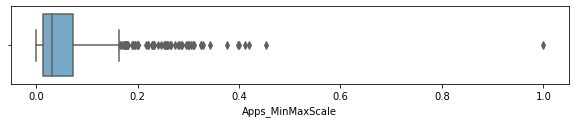

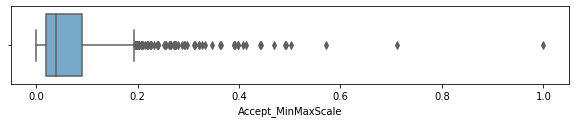

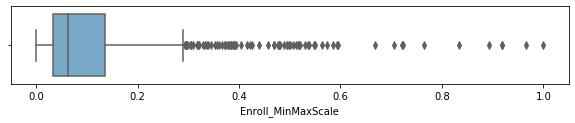

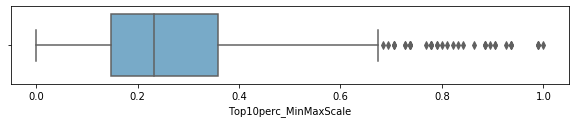

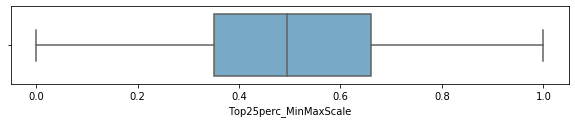

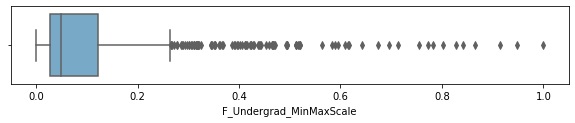

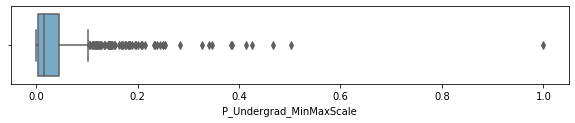

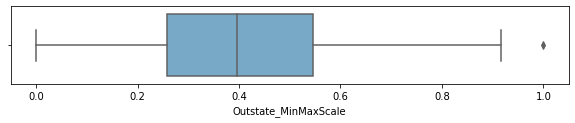

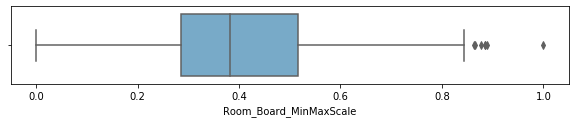

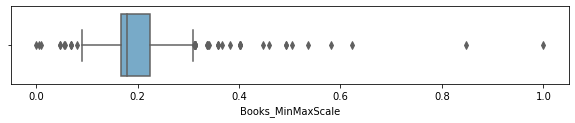

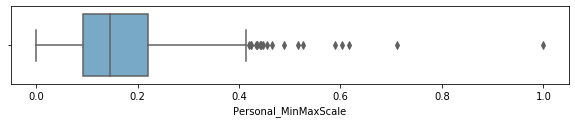

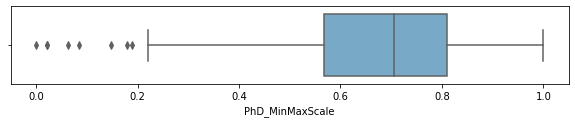

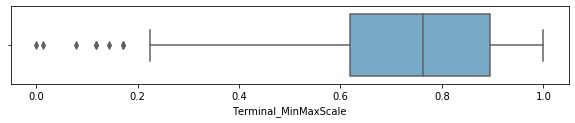

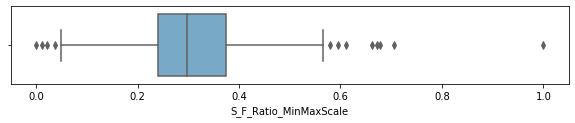

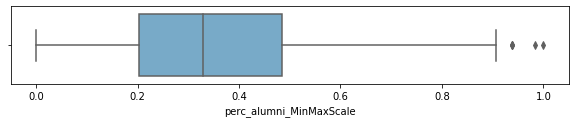

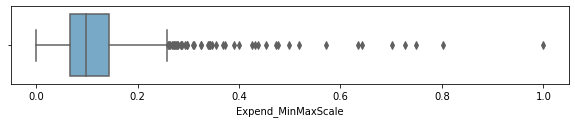

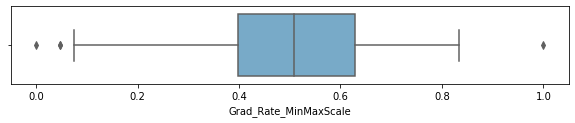

In [131]:
plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=df['Apps_MinMaxScale'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=df['Accept_MinMaxScale'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=df['Enroll_MinMaxScale'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=df['Top10perc_MinMaxScale'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=df['Top25perc_MinMaxScale'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=df['F_Undergrad_MinMaxScale'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=df['P_Undergrad_MinMaxScale'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=df['Outstate_MinMaxScale'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=df['Room_Board_MinMaxScale'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=df['Books_MinMaxScale'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=df['Personal_MinMaxScale'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=df['PhD_MinMaxScale'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=df['Terminal_MinMaxScale'],palette = 'Blues')


plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=df['S_F_Ratio_MinMaxScale'],palette = 'Blues')

plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=df['perc_alumni_MinMaxScale'],palette = 'Blues')


plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=df['Expend_MinMaxScale'],palette = 'Blues')


plt.figure(figsize =(10,10))
plt.subplot(6,1,1)
sns.boxplot(x=df['Grad_Rate_MinMaxScale'],palette = 'Blues')
